In [ ]:
# !pip install wordcloud
# !pip install twitterscraper
# !pip install tqdm

In [86]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from twitterscraper import query_tweets
from tqdm import tqdm

# Turning off all kinds of logging since it takes space on screen
import logging
logging.disable(logging.CRITICAL)

### Useful functions for creating dataframe

In [35]:
def tweets_df(results):
    data_set = pd.DataFrame()
    
    data_set["user_id"] = [tweet.user_id for tweet in results]
    data_set["screen_name"] = [tweet.screen_name for tweet in results]
    data_set["tweet_id"] = [tweet.tweet_id for tweet in results]
    data_set["tweet_url"] = [tweet.tweet_url for tweet in results]
    data_set["timestamp"] = [tweet.timestamp for tweet in results]
    data_set["text"] = [tweet.text for tweet in results]
    data_set["hashtags"] = [tweet.hashtags for tweet in results]
    data_set["has_media"] = [tweet.has_media for tweet in results]
    data_set["img_urls"] = [tweet.img_urls for tweet in results]
    data_set["video_url"] = [tweet.video_url for tweet in results]
    
    # Drop duplicates and reset index
    data_set.drop_duplicates(subset = ["tweet_id","text"], inplace=True)
    data_set.reset_index(drop=True, inplace=True)
    
    return data_set

In [100]:
# This function takes time to execute when called!

def get_location(df):
    locs = []
    with tqdm(total = len(df)) as pbar:
        for name in df.screen_name:
            user = query_user_info(name)
            if user != None:
                locs.append(user.location)
            else:
                locs.append(' ')
            pbar.update(1)
        
    # Adding column for locations
    df["user_location"] = locs

## ~ Using twitterscraper with Twitter's advanced search query 
From: 01 Jan'20 

To: 20 May'20

Location: Radius of 2000km from central point of India

Language: English

In [ ]:
tweets = query_tweets("harassment (sexual OR abuse OR harass OR obscene OR domestic OR violence OR beat OR assault OR \
                      pictures OR molest OR dowry OR money OR acidattack OR rape OR action OR accused OR pornography OR \
                      porn OR molestation OR shame OR #metoo OR tiktok OR content OR online OR illegal OR report OR justice OR lockdown OR victim) \
                      until:2020-05-20 since:2020-01-01 -filter:replies near:22,80 within:2000km", limit=None, lang='en');
print(f'Got {len(tweets)} tweets.')

Got 720 tweets.

In [101]:
data_set = tweets_df(tweets)
get_location(data_set)

  0%|▍                                                                              | 1/720 [00:03<43:40,  2.58s/it]


### Extracting more tweets (different query) and saving in df1

In [88]:
more_tweets1 = query_tweets("sexual (harassing OR harass OR harassed OR abuse OR domestic OR violence OR beat OR assault OR \
                            pictures OR molest OR dowry OR acidattack OR rape OR shame OR accused OR pornography OR porn OR \
                            metoo OR tiktok OR content OR online OR illegal OR report OR justice OR lockdown OR victim) \
                            until:2020-05-20 since:2020-01-01 -filter:replies near:22,80 within:2000km", limit=None, lang='en');
print(f'Got {len(more_tweets1)} tweets.')

Got 1536 tweets.

In [93]:
df1 = tweets_df(more_tweets1)
get_location(df1)

  1%|▍                                                                              | 8/1536 [00:20<1:05:47,  2.58s/it]


### Extracting more tweets (different query) and saving in df2

In [87]:
more_tweets2 = query_tweets("(wife OR husband) AND (abuse OR violence OR beat OR rape) until:2020-05-20 since:2020-01-01 -filter:replies near:22,80 within:2000km", 
                            limit=None, lang='en');
print(f'Got {len(more_tweets2)} tweets.')

Got 188 tweets.

In [91]:
df2 = tweets_df(more_tweets2)
get_location(df2)

  0%|                                                                                          | 0/188 [00:42<?, ?it/s]


## *Appending all dataframes*

In [84]:
data_set = data_set.append(df2, ignore_index= True)
data_set

,user_id,screen_name,tweet_id,tweet_url,timestamp,text,hashtags,has_media,img_urls,video_url,user_location
0,1139435031204548608,zkwnsaari,1262868325803024389,/zkwnsaari/status/1262868325803024389,2020-05-19 22:10:46,"Cornering men with the phrase ""sexual harassme...",[],False,[],,"Perak, Malaysia"
1,1262662724628238338,anuglywoman1,1262856464651243525,/anuglywoman1/status/1262856464651243525,2020-05-19 21:23:38,Sexual harassment..is to make someone fucked u...,[],False,[],,
2,15199808,Vidyut,1262838343404044296,/Vidyut/status/1262838343404044296,2020-05-19 20:11:38,Fellow asking about abuse women face online/st...,[],False,[],,India
3,356133910,mymeenakshi,1262830274498293762,/mymeenakshi/status/1262830274498293762,2020-05-19 19:39:34,Respected @dgpup @UPGovt @CMOfficeUP Sir this...,[ArrestPankajPunia],True,[https://pbs.twimg.com/media/EYZ5b68VAAAFV9r.jpg],,India
4,257394747,PramodChturvedi,1262824245517672449,/PramodChturvedi/status/1262824245517672449,2020-05-19 19:15:36,Case registered against employee of private co...,"[AndhraPradesh, Krishna]",False,[],,"Hyderabad, New Delhi, Ballia"
...,...,...,...,...,...,...,...,...,...,...,...
2438,20671181,pallavising,1214571398355533824,/pallavising/status/1214571398355533824,2020-01-07 15:36:01,Need to buy a smartphone for my house help. Sh...,[],False,[],,"Gurgaon, India"
2439,1109499459212398592,Mide_Froshbanks,1214540089759535104,/Mide_Froshbanks/status/1214540089759535104,2020-01-07 13:31:37,Ha mogbe what did we carry what did you throw...,[],False,[],,"Dubai, United Arab Emirates"
2440,172236184,sritharan54,1214140454159040514,/sritharan54/status/1214140454159040514,2020-01-06 11:03:36,Funny this dog left India abandoning wife and ...,[],False,[],,
2441,134071982,iatulshukla,1214119031600381952,/iatulshukla/status/1214119031600381952,2020-01-06 09:38:29,Kind of person Anurag Kashyap is itself an abu...,[],False,[],,India


In [ ]:
# Saving the file

data_set.to_csv('more-tweets-extracted.csv', index=False)

In [18]:
# Locations are mostly from India and some from nearby places
data_set.user_location.value_counts()

India                             118
                                   60
New Delhi, India                   59
Mumbai, India                      31
Nagpur, India                      23
                                 ... 
Bombay, India                       1
Bharat                              1
Islamabad                           1
Ludhiana, India                     1
SRA-102C Indirapuram Ghaziabad      1
Name: user_location, Length: 346, dtype: int64

## Analysis of tweets count vs month

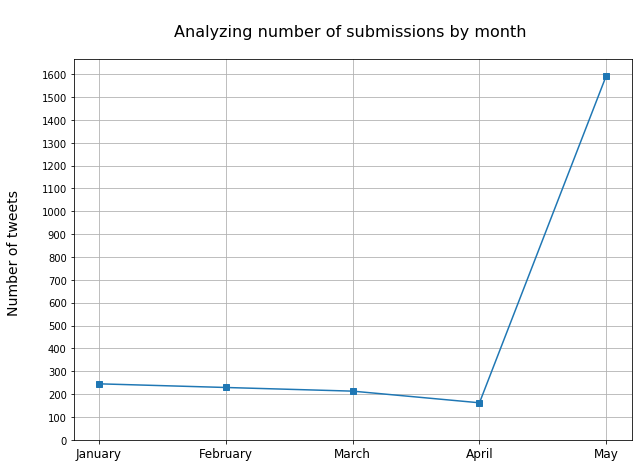

In [99]:
resampled_data = data_set.resample("M", on='timestamp').count()[['tweet_id']]
resampled_data.rename(columns = {'tweet_id':'total_tweets'}, inplace = True) 
resampled_data['month'] = resampled_data.index.month

labels = ["January", "February", "March", "April", "May"]
total = len(data_set)
data_months = {i: 0 for i in range(1, 6)}

for k, v in data_months.items():
    data_months[k] = np.sum(resampled_data.total_tweets[resampled_data.month == k])

plt.figure(figsize =(10,7))
plt.plot(*zip(*sorted(data_months.items())), marker='s')

plt.xticks(list(data_months.keys()), labels, fontsize=12)
plt.yticks(np.arange(0, max(data_months.values())+100, 100))
plt.ylabel("Number of tweets \n", fontsize=14)
plt.title("\nAnalyzing number of submissions by month \n", fontsize=16)
plt.grid()
plt.show()

In [94]:
# Getting insights by creating a wordcloud

def make_wordcloud(col):
    print('Creating wordcloud...')
    contentCorpus = col.values
    wordcloud = WordCloud(width = 3000, height = 2000, max_words=750).generate(str(contentCorpus))
    fig = plt.figure(figsize = (10, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title('Content Corpus')
    plt.show()

Creating wordcloud...


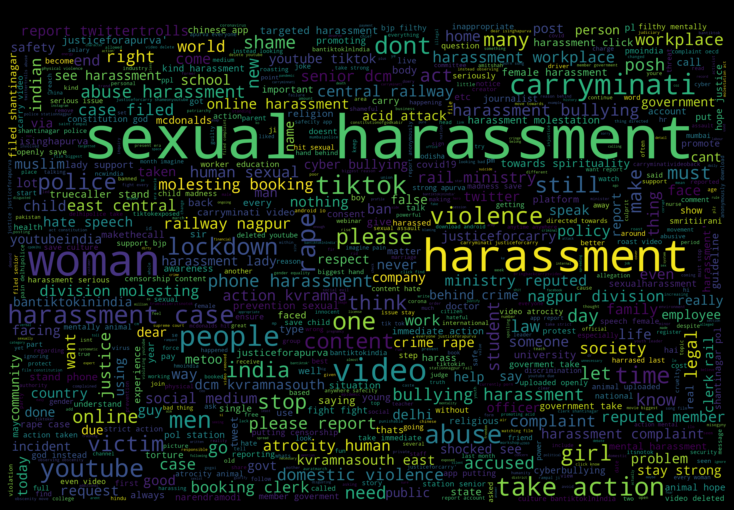

In [32]:
make_wordcloud(data_set['text'])